In [1]:
#Librerias a cargar
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

import missingno as ms

from sklearn.model_selection import train_test_split

%reload_ext autoreload
%autoreload 2
import analisis_modelos as pf
import inspect
from IPython.display import Markdown, display

from imblearn.over_sampling import SMOTE

rmst = 123

In [2]:
#Carga de los conjuntos de datos resultantes de la Parte 1
conjunto_datos = pd.read_csv('depresion2020_modelo.csv',index_col= 1)
conjunto_datos = conjunto_datos.drop('Unnamed: 0',axis=1)

In [3]:
#Cambiamos etiquetas a 0 y 1 (clasificación binaria)
conjunto_datos['depresion'] = np.where((conjunto_datos['depresion'] == 2),0,1)

In [4]:
# Atributos Outliers
drop_col = ['depresion_12meses']

In [5]:
conjunto_datos = conjunto_datos.drop(drop_col,axis=1)

In [6]:
conjunto_datos.reset_index(drop = True, inplace = True)

In [7]:
#Creamos los modelos de entrenamiento y test
X = conjunto_datos.drop('depresion', axis=1)
y = conjunto_datos.depresion

In [8]:
#Ojo con el desbalanceo de la variable objetivo
print(y.value_counts())

0    19957
1     2115
Name: depresion, dtype: int64


Clase 0: 19957
Clase 1: 2115
Proportion: 9.44 : 1


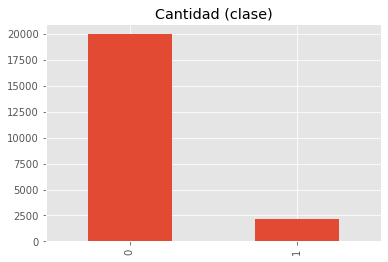

In [9]:
target_count = y.value_counts()
cero = target_count[0]
uno = target_count[1]
print('Clase 0:', cero)
print('Clase 1:', uno)
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Cantidad (clase)');

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.20, 
                                                    random_state=rmst, 
                                                    stratify= y)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17657, 37)
(4415, 37)
(17657,)
(4415,)


In [12]:
# Looking at the custom function for making a classification report
func = inspect.getsource(pf.make_classification_report)

In [13]:
# Looking at the custom function for plotting a confusion matrix
func = inspect.getsource(pf.plot_confusion_matrix)

In [14]:
# Looking at the custom function for plotting an ROC curve
func = inspect.getsource(pf.plot_roc_curve)

In [15]:
# Looking at the custom function to display top features from tree models
func = inspect.getsource(pf.plot_top_features)

In [16]:
# Looking at the custom function that will run all the evaluation functions
func = inspect.getsource(pf.evaluate_model)

## Regresión Logística CV

In [17]:
# Import package
from sklearn.linear_model import LogisticRegressionCV

In [18]:
# Creating classifier
logreg_clf = LogisticRegressionCV(random_state=rmst,
                                  n_jobs=-1,
                                  cv = 10
                                  )

# Fitting to the training data
logreg_base = logreg_clf.fit(X_train, y_train)

__________________________________________________________________
Reporte para el Clasificador: 
	Regresión Logística con Cross-Validation
__________________________________________________________________


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3992
           1       0.60      0.33      0.42       423

    accuracy                           0.91      4415
   macro avg       0.77      0.65      0.69      4415
weighted avg       0.90      0.91      0.90      4415

__________________________________________________________________


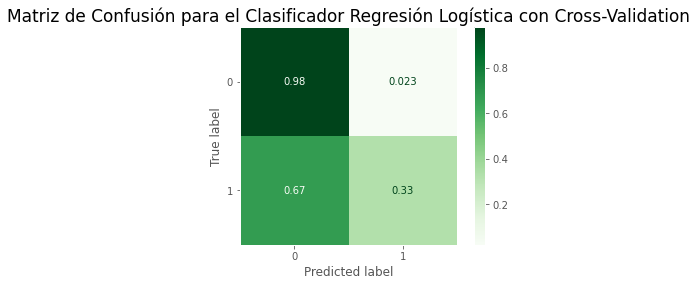

__________________________________________________________________


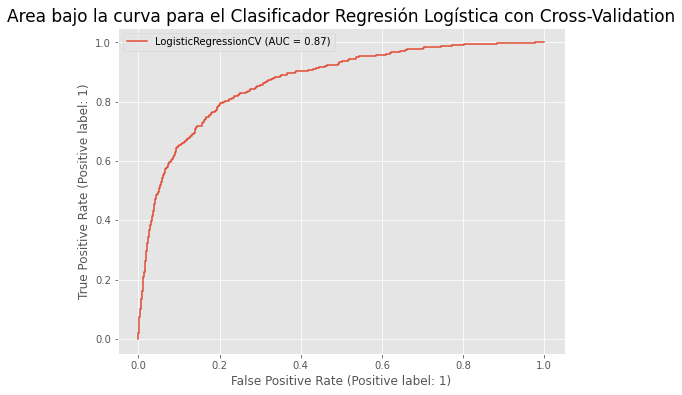

In [19]:
# Evaluating the model
pf.evaluate_model(logreg_base, X_train, X_test, y_test, 
               title='Regresión Logística con Cross-Validation')

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
# Creating classifier
tree_clf = DecisionTreeClassifier(random_state=rmst)

tree_base = tree_clf.fit(X_train, y_train)

__________________________________________________________________
Reporte para el Clasificador: 
	Arbol de Desición
__________________________________________________________________


              precision    recall  f1-score   support

           0       0.93      0.92      0.93      3992
           1       0.33      0.37      0.35       423

    accuracy                           0.87      4415
   macro avg       0.63      0.65      0.64      4415
weighted avg       0.88      0.87      0.87      4415

__________________________________________________________________


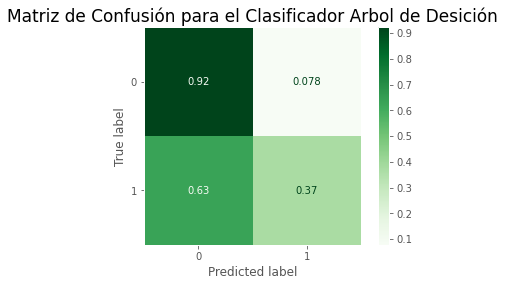

__________________________________________________________________


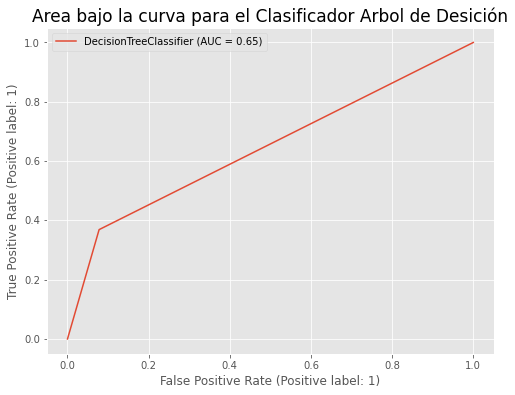

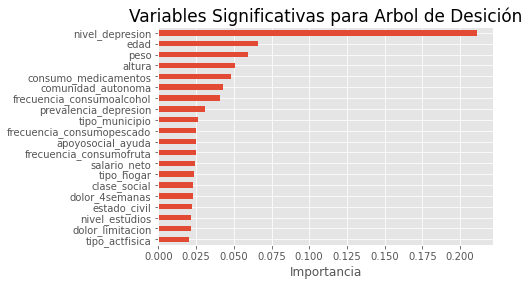

In [22]:
# Evaluate the model
pf.evaluate_model(tree_base, X_train, X_test, y_test, 
               tree=True, title='Arbol de Desición')

## Random Forest

In [23]:
# Import package
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Creating classifier
forest_clf = RandomForestClassifier(n_jobs=-1, 
                                    random_state=rmst)

# Fitting to the training data
forest_base = forest_clf.fit(X_train, y_train)

__________________________________________________________________
Reporte para el Clasificador: 
	Random Forest
__________________________________________________________________


              precision    recall  f1-score   support

           0       0.93      0.99      0.95      3992
           1       0.65      0.26      0.37       423

    accuracy                           0.92      4415
   macro avg       0.79      0.62      0.66      4415
weighted avg       0.90      0.92      0.90      4415

__________________________________________________________________


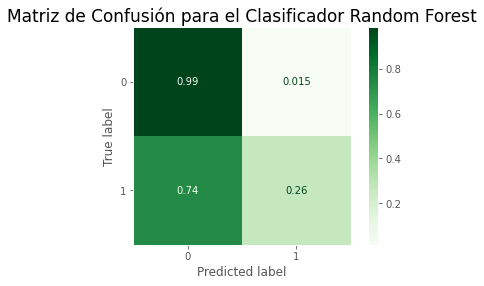

__________________________________________________________________


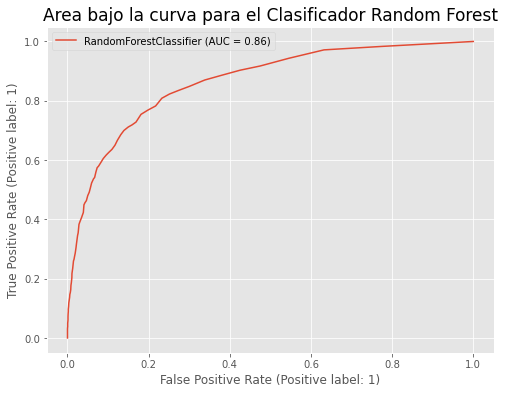

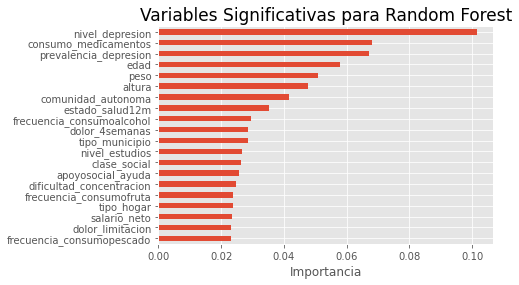

In [25]:
# Evaluate the model
pf.evaluate_model(forest_base, X_train, X_test, y_test, 
               tree=True, title='Random Forest')

## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
gnb_clf = GaussianNB()

nb_base = gnb_clf.fit(X_train, y_train)

__________________________________________________________________
Reporte para el Clasificador: 
	Naive Bayes
__________________________________________________________________


              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3992
           1       0.29      0.66      0.40       423

    accuracy                           0.81      4415
   macro avg       0.62      0.74      0.64      4415
weighted avg       0.89      0.81      0.84      4415

__________________________________________________________________


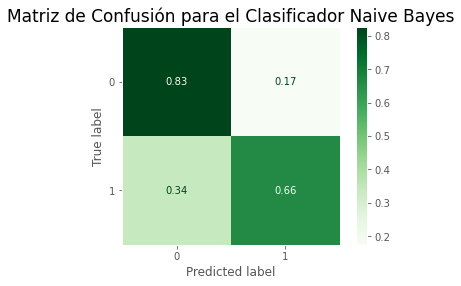

__________________________________________________________________


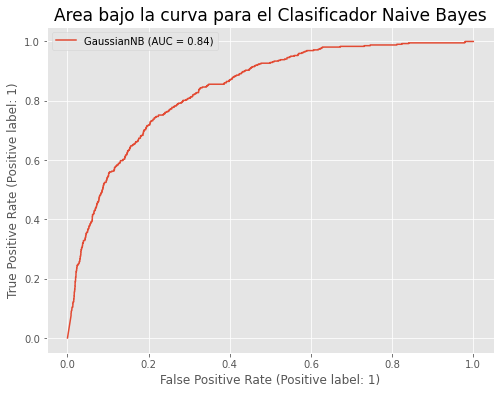

In [30]:
pf.evaluate_model(nb_base, X_train, X_test, y_test, 
               title='Naive Bayes')

# xgboost

In [31]:
from xgboost import XGBClassifier

In [32]:
xgb_clf = XGBClassifier(seed = rmst)

xgb_base = xgb_clf.fit(X_train, y_train)

__________________________________________________________________
Reporte para el Clasificador: 
	Xgboost
__________________________________________________________________


              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3992
           1       0.65      0.31      0.42       423

    accuracy                           0.92      4415
   macro avg       0.79      0.65      0.69      4415
weighted avg       0.90      0.92      0.90      4415

__________________________________________________________________


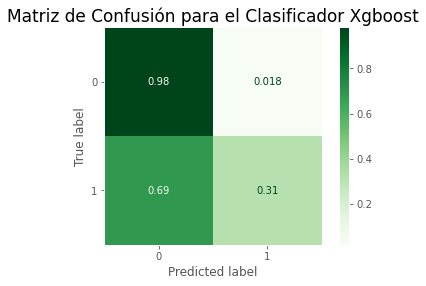

__________________________________________________________________


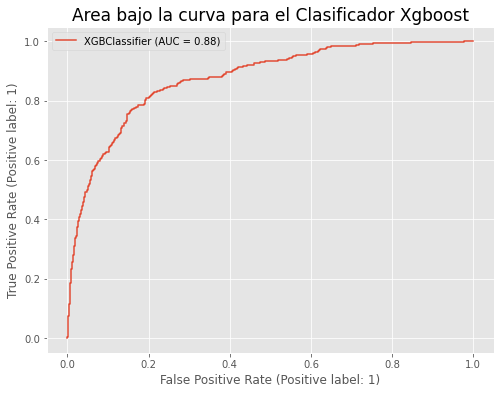

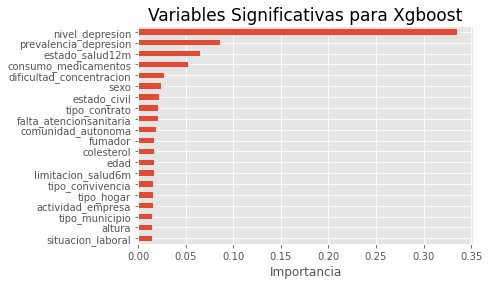

In [33]:
pf.evaluate_model(xgb_base, X_train, X_test, y_test, 
               title='Xgboost', tree=True)

# Catboost

In [34]:
from catboost import CatBoostClassifier

In [35]:
cat_clf = CatBoostClassifier(random_state = rmst)

cat_base = cat_clf.fit(X_train, y_train,early_stopping_rounds=3,verbose=False)

__________________________________________________________________
Reporte para el Clasificador: 
	Catboost
__________________________________________________________________


              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3992
           1       0.65      0.33      0.44       423

    accuracy                           0.92      4415
   macro avg       0.79      0.65      0.70      4415
weighted avg       0.91      0.92      0.91      4415

__________________________________________________________________


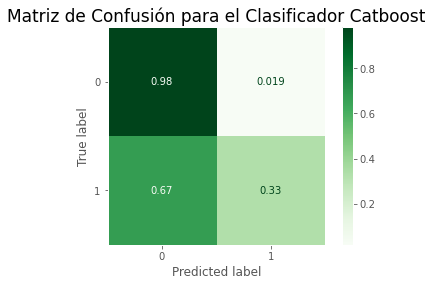

__________________________________________________________________


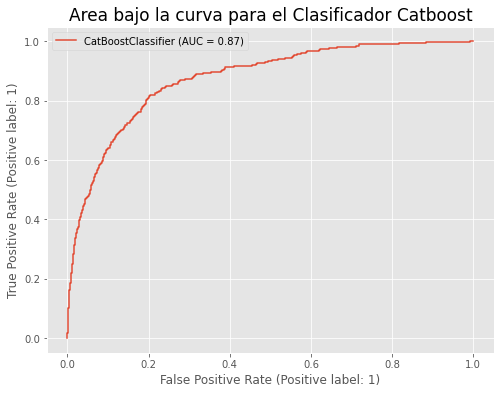

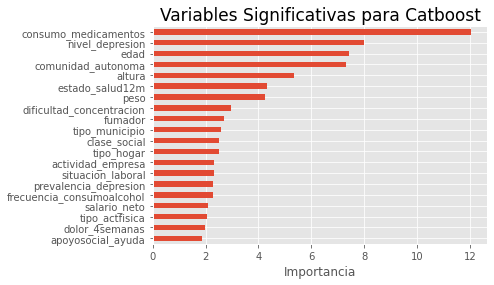

In [36]:
# Evaluating the model
pf.evaluate_model(cat_base, X_train, X_test, y_test, 
               title='Catboost',tree=True)

# Extra Trees

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
extratrees_clf = ExtraTreesClassifier(n_jobs=-1, random_state=rmst)

extratrees_base = extratrees_clf.fit(X_train, y_train)

__________________________________________________________________
Reporte para el Clasificador: 
	Clasificador Extra Trees
__________________________________________________________________


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3992
           1       0.64      0.26      0.37       423

    accuracy                           0.92      4415
   macro avg       0.78      0.62      0.66      4415
weighted avg       0.90      0.92      0.90      4415

__________________________________________________________________


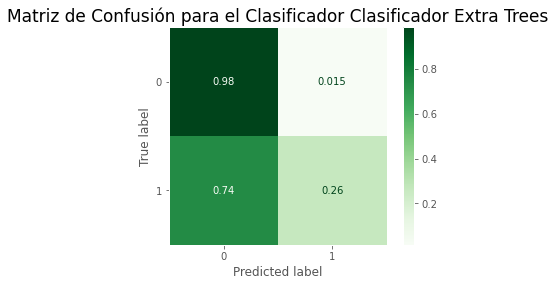

__________________________________________________________________


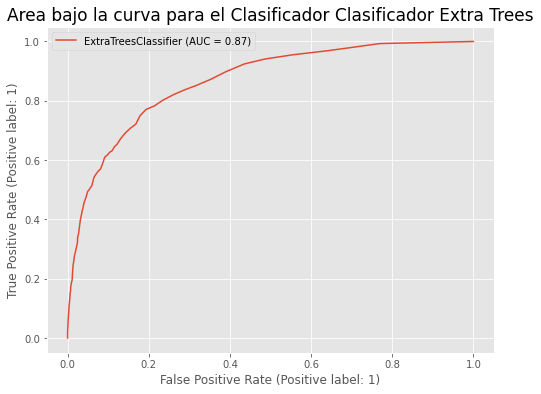

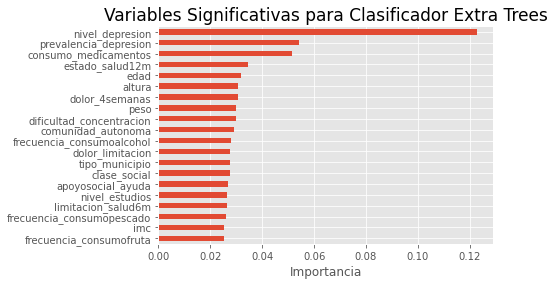

In [39]:
pf.evaluate_model(extratrees_base, X_train, X_test, y_test, 
               tree=True, title='Clasificador Extra Trees')

# Stochastic Gradient Descent Linear Classifier

In [40]:
from sklearn.linear_model import SGDClassifier

In [41]:
sgd_clf = SGDClassifier(random_state= rmst, n_jobs=-1)

sgd_base = sgd_clf.fit(X_train, y_train)

__________________________________________________________________
Reporte para el Clasificador: 
	Clasificador SGD
__________________________________________________________________


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3992
           1       0.54      0.35      0.42       423

    accuracy                           0.91      4415
   macro avg       0.74      0.66      0.69      4415
weighted avg       0.90      0.91      0.90      4415

__________________________________________________________________


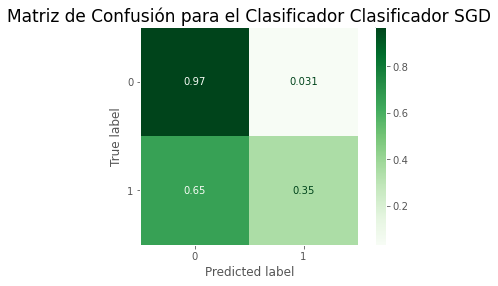

__________________________________________________________________


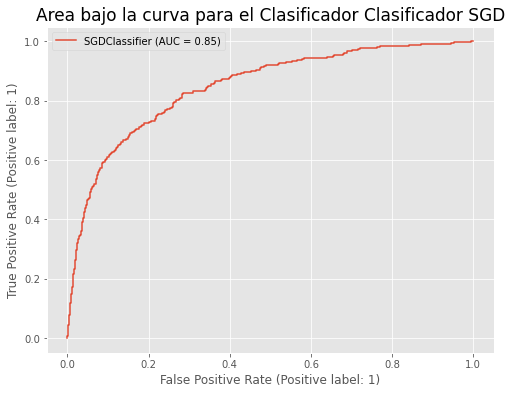

In [42]:
pf.evaluate_model(sgd_base, X_train, X_test, y_test, 
               title='Clasificador SGD')

# METRICAS PARA COMPARAR 

In [45]:
clasificador = {"Regresión Logística":logreg_clf,
                "Arbol de Decisión": tree_clf,
                "Random Forest": forest_clf,
                "Naive Bayes": gnb_clf,
                "Xgboost": xgb_clf,
                "CatBoost": cat_clf,
                "Extra Trees": extratrees_clf,
                "SGD": sgd_clf
               }

In [46]:
#Precisión
from sklearn.metrics import accuracy_score

for nombre,clasf in clasificador.items():
    accuracy_clf= accuracy_score(y_true = y_test,
                                 y_pred = clasf.predict(X_test)
                                )

    acc_test = round(accuracy_clf,3)
    print("La precisión para el Modelo - %s" % nombre, "es: %s" %acc_test)

La precisión para el Modelo - Regresión Logística es: 0.915
La precisión para el Modelo - Arbol de Decisión es: 0.869
La precisión para el Modelo - Random Forest es: 0.916
La precisión para el Modelo - Naive Bayes es: 0.81
La precisión para el Modelo - Xgboost es: 0.918
La precisión para el Modelo - CatBoost es: 0.919
La precisión para el Modelo - Extra Trees es: 0.915
La precisión para el Modelo - SGD es: 0.909


In [47]:
#Recall
from sklearn.metrics import recall_score

for nombre,clasf in clasificador.items():
    recall_clf = recall_score(y_true = y_test,
                              y_pred = clasf.predict(X_test),
                              average = None
                             )
    clase0 = round(recall_clf[0],3)
    clase1 = round(recall_clf[1],3)
    
    print("El recall para el Modelo - %s" % nombre, "es:", "[0] %s" % clase0, "[1] %s" % clase1)


El recall para el Modelo - Regresión Logística es: [0] 0.977 [1] 0.326
El recall para el Modelo - Arbol de Decisión es: [0] 0.922 [1] 0.369
El recall para el Modelo - Random Forest es: [0] 0.985 [1] 0.26
El recall para el Modelo - Naive Bayes es: [0] 0.826 [1] 0.664
El recall para el Modelo - Xgboost es: [0] 0.982 [1] 0.312
El recall para el Modelo - CatBoost es: [0] 0.981 [1] 0.329
El recall para el Modelo - Extra Trees es: [0] 0.985 [1] 0.26
El recall para el Modelo - SGD es: [0] 0.969 [1] 0.348


En conclusión, todos los modelos retornas un porcentaje muy bajo en la clasificación de la clase [1]